> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDB-Movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this investigation project i chose TMDB-Movies dataset. it is a database of 10k movies which include 21 column such as  user rating , budgets and many other properties about each movie.

>Questions:-
#### 1-Which movie has the highest and lowest revenue ?
#### 2-Which movie has the highest and lowest budget ?
#### 3-How much the profit gained from each movie ?
#### 4-Which movie has the highest and lowest profit ?
#### 5-Which movie is underrated and which one is overrated ?

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### loading dataset then storing it in 'df' and printing some rows to explore dataset

In [75]:
df=pd.read_csv('C:/Users/Administrator/Downloads/tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#check dimensions of dataset
df.shape

(10866, 21)

In [4]:
#Check for information about dataset such as no.of non-null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#check for no.of unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64



## Data Cleaning check:
#### 1- I  checked for duplcated rows 
#### 2- then checked for null values
#### 3- i also checked for datatypes and converted release_date column from object to datetime

In [6]:
#check for duplicated rows 
df.duplicated().sum()

1

after finding duplicated row so i will drop it

In [33]:
df.drop_duplicates(inplace=True)

#### Check for duplicated again to make sure that there are no duplicated rows

In [8]:
df.duplicated().sum()

0

In [9]:
#No.of rows
df.shape

(10865, 21)

# Now, its time to check for null values

In [10]:
# Now, its time to check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
# No null values !
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Now its time to check for datatypes

In [13]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1992 non-null   int64  
 1   imdb_id               1992 non-null   object 
 2   popularity            1992 non-null   float64
 3   budget                1992 non-null   int64  
 4   revenue               1992 non-null   int64  
 5   original_title        1992 non-null   object 
 6   cast                  1992 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              1992 non-null   object 
 9   tagline               1992 non-null   object 
 10  keywords              1992 non-null   object 
 11  overview              1992 non-null   object 
 12  runtime               1992 non-null   int64  
 13  genres                1992 non-null   object 
 14  production_companies  1992 non-null   object 
 15  release_date        

In [14]:
# here release_date is object type not datetime type so lets convert it !
df['release_date']=pd.to_datetime(df['release_date'])

#lets check ? 
df.dtypes
# Converted successfully !

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [15]:
#check for rows ?
df.shape

(1992, 21)

In [16]:
# Before starting exploratory data analysis phase we may remove some unneccessary columns 
removed_col=['id','imdb_id','popularity','homepage','keywords','overview','revenue_adj','budget_adj']
df=df.drop(removed_col,1)
df.head(1)

<ipython-input-16-530eb25a64f9>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(removed_col,1)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which movie has the highest and lowest revenue ?)

In [17]:
# Movies ? of course the first question will be about the revenue
high_revenue=df['revenue'].idxmax()
df_high_revenue=pd.DataFrame(df.loc[high_revenue])
df_high_revenue


,1386
budget,237000000
revenue,2781505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
tagline,Enter the World of Pandora.
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
production_companies,Ingenious Film Partners|Twentieth Century Fox ...
release_date,2009-12-10 00:00:00


In [18]:
#and row no. 67 has the lowest revenue
low_revenue=df['revenue'].idxmin()
df_low_revenue=pd.DataFrame(df.loc[low_revenue])
df_low_revenue


,67
budget,20000000
revenue,0
original_title,Survivor
cast,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...
director,James McTeigue
tagline,His Next Target is Now Hunting Him
runtime,96
genres,Crime|Thriller|Action
production_companies,Nu Image Films|Winkler Films|Millennium Films|...
release_date,2015-05-21 00:00:00


### Research Question 2  (Which movie has the highest and lowest budget ?)

In [19]:
high_budget=df['budget'].idxmax()
df_high_budget=pd.DataFrame(df.loc[high_budget])
df_high_budget

,2244
budget,425000000
revenue,11087569
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
tagline,Assassin. Hero. Legend.
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
production_companies,Boram Entertainment Inc.
release_date,2010-12-02 00:00:00


In [20]:
low_budget=df['budget'].idxmin()
df_low_budget=pd.DataFrame(df.loc[low_budget])
df_low_budget

,30
budget,0
revenue,29355203
original_title,Mr. Holmes
cast,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Bill Condon
tagline,The man behind the myth
runtime,103
genres,Mystery|Drama
production_companies,BBC Films|See-Saw Films|FilmNation Entertainme...
release_date,2015-06-19 00:00:00


### Research Question 3  (How much the profit gained from each movie ? )

In [21]:
# When we want to know if this movie is good or not we may ask about its profit
# So we will check about its profit but we dont have profit column so we'll make a column called 'Profit'
# By subtracting budget from revenue 
# Profit=(df['revenue']-df['budget'])
# df=df.insert(2,'profit',Profit)
df.insert(2,'profit',df['revenue']-df['budget'])

In [22]:
df.head()

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


### Research Question 4  (Which movie has the highest and lowest profit ?)

In [23]:
High_profit=df['profit'].idxmax()
df_high_profit=pd.DataFrame(df.loc[High_profit])
df_high_profit

,1386
budget,237000000
revenue,2781505847
profit,2544505847
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
tagline,Enter the World of Pandora.
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
production_companies,Ingenious Film Partners|Twentieth Century Fox ...


In [24]:
low_profit=df.profit.idxmin()
df_low_profit=pd.DataFrame(df.loc[low_profit])
df_low_profit

,2244
budget,425000000
revenue,11087569
profit,-413912431
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
tagline,Assassin. Hero. Legend.
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
production_companies,Boram Entertainment Inc.


In [25]:
# delete_columns=['most_recent_order_date','order_count']
# df=df.drop(delete_columns,1)
df.head()


,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


### Research Question 5  (Which movie is underrated and which one is overrated ?)

In [70]:
# we can check for the highest voted movie in this dataset 
high_vote=df['vote_average'].idxmax()
df_high_vote=pd.DataFrame(df.loc[high_vote])
df_high_vote.head()

,7269
budget,6000000
revenue,245066411
profit,239066411
original_title,The Godfather
cast,Marlon Brando|Al Pacino|James Caan|Richard S. ...
director,Francis Ford Coppola
tagline,An offer you can't refuse.
runtime,175
genres,Drama|Crime
production_companies,Paramount Pictures|Alfran Productions


In [27]:
# we can check for the lowest voted movie in this dataset 
low_vote=df['vote_average'].idxmin()
df_low_vote=pd.DataFrame(df.loc[low_vote])
df_low_vote

,7220
budget,0
revenue,9109322
profit,9109322
original_title,Superbabies: Baby Geniuses 2
cast,Jon Voight|Scott Baio|Vanessa Angel|Skyler Sha...
director,Bob Clark
tagline,Meet the new generation of superheroes.
runtime,88
genres,Family|Comedy
production_companies,Crystal Sky Worldwide|Triumph Films


revenue
0             AxesSubplot(0.125,0.125;0.775x0.755)
10            AxesSubplot(0.125,0.125;0.775x0.755)
43            AxesSubplot(0.125,0.125;0.775x0.755)
46            AxesSubplot(0.125,0.125;0.775x0.755)
125           AxesSubplot(0.125,0.125;0.775x0.755)
                              ...                 
1513528810    AxesSubplot(0.125,0.125;0.775x0.755)
1519557910    AxesSubplot(0.125,0.125;0.775x0.755)
1845034188    AxesSubplot(0.125,0.125;0.775x0.755)
2068178225    AxesSubplot(0.125,0.125;0.775x0.755)
2781505847    AxesSubplot(0.125,0.125;0.775x0.755)
Name: director, Length: 1445, dtype: object

C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


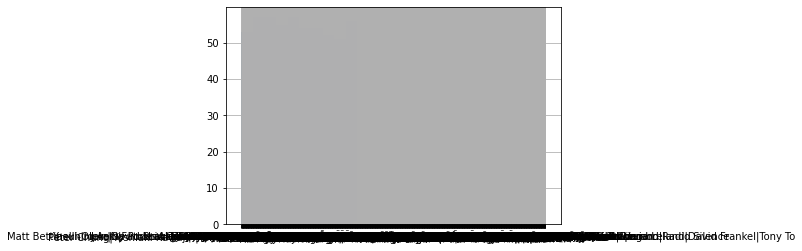

In [29]:
# df.budget.hist(label='budget');
# df.genres.hist(label='genres')
# plt.legend()
df.groupby('revenue')['director'].hist()

### histogram for all columns

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'profit'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'release_date'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>, <AxesSubplot:>]],
      dtype=object)

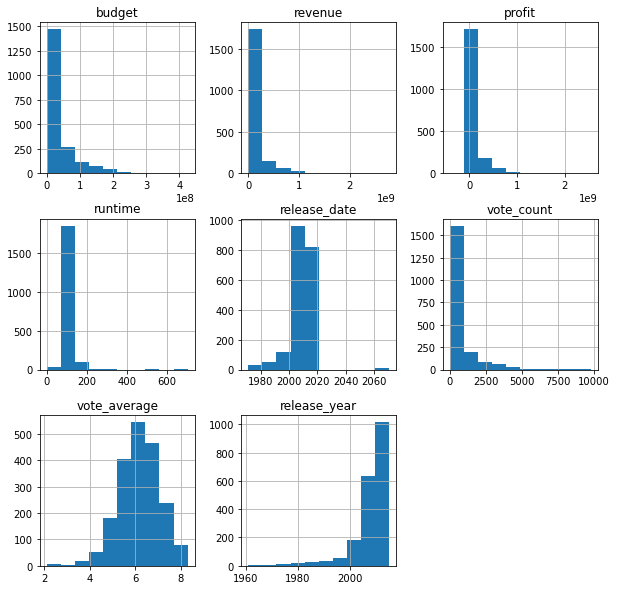

In [30]:
df.hist(figsize=(10,10))

### histogram between release years and runtimes
#### it is clear that runtime decreases till release years increse

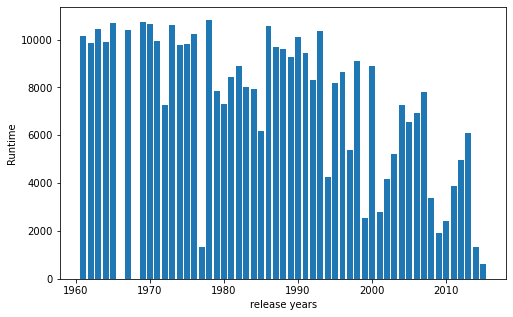

In [64]:

plt.subplots(figsize=(8, 5))
plt.bar(df.release_year.values,df.runtime.index )
plt.xlabel('release years')
plt.ylabel('Runtime');

In [49]:
Profit_year=df.groupby('release_year')['profit'].sum()
Profit_year

release_year
1961        1000000
1962       58500000
1963       76398765
1964      121900549
1965      130195658
1967      102084787
1969       74974493
1970              0
1971      170269000
1972      239066411
1973      588083981
1974       90512000
1975      579975267
1976        -150000
1977      935836680
1978      286321952
1979      385610148
1980      540778361
1981      650164919
1982      790962062
1983      901812147
1984      648928023
1985      516238643
1986      -14000000
1987      385742146
1988       30806332
1989      870823860
1990      722978490
1991      336785279
1992     1016419063
1993     1272379993
1994     1019572528
1995     1025681406
1996     1116678642
1997     2761586793
1998      794569235
1999     3851184237
2000     1223840750
2001     3273328186
2002     4132386568
2003     3949354953
2004     5896472454
2005     3737481859
2006     6091593497
2007    10496818756
2008     8074798022
2009    12862629013
2010    11704279321
2011    13984826653
2012   

#### histogram between release years and profit

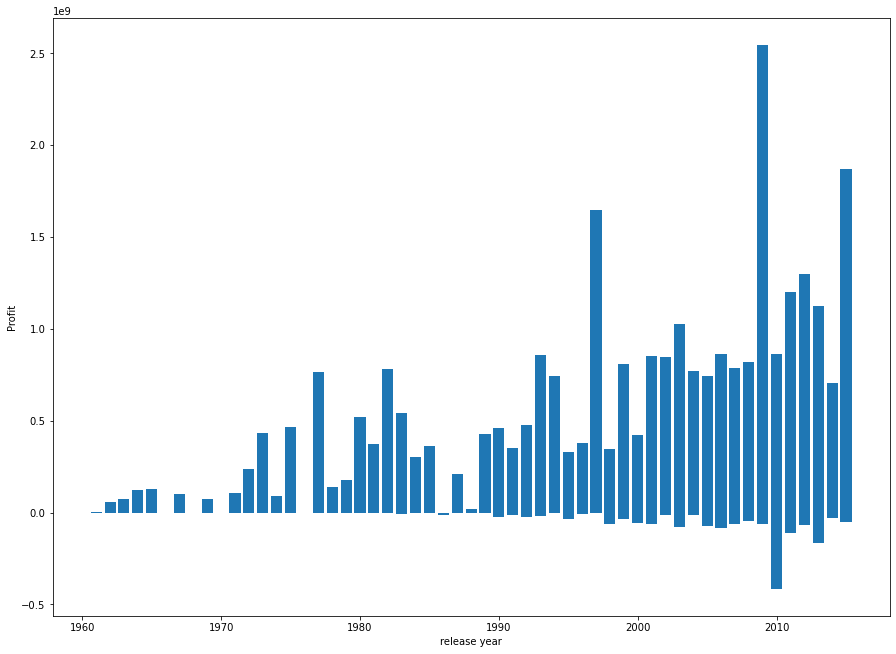

In [65]:
plt.subplots(figsize=(15, 11))
plt.bar(df.release_year.values,df.profit.values )
plt.xlabel('release year')
plt.ylabel('Profit');

In [82]:

df.vote_count.max(),df.vote_count.min()

(9767, 10)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

## After analysing and exploring this dataset i concluded that :
#### 1- 'Avatar' movie has the highest revenue but 'Survivor' has the lowest one.
#### 2-'The Warrior's Way' movie has the highest budget but 'Mr. Holmes' has the lowest one.
#### 3-'Avatar' movie has the highest profit but 'The Warrior's Way' has the lowest one.
#### 4-'The Godfather' movie is the most voted movie but 'Superbabies: Baby Geniuses 2' is the lowest one.
#### 5- the average of 'voting average' is 5.9 and aslo average of voted people is 271.38


